![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

où $u_j^n \simeq u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

où $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

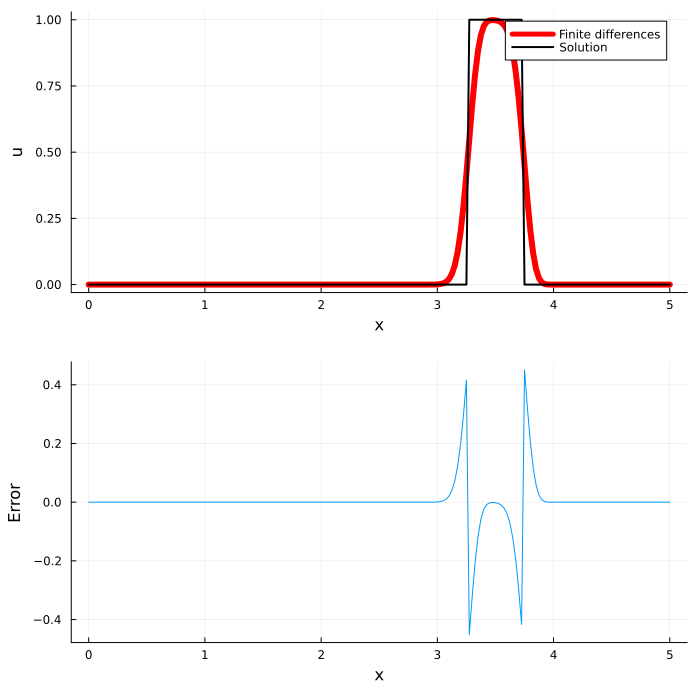

Δx: 0.025	 Δt:0.225	 max error: 0.45129025988048765


In [3]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt =100                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

In [2]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`


   Resolving package versions...


   Installed XML2_jll ────────────── v2.9.14+0


   Installed Wayland_protocols_jll ─ v1.25.0+0
   Installed JpegTurbo_jll ───────── v2.1.2+0
   Installed GR_jll ──────────────── v0.71.1+0


   Installed Scratch ─────────────── v1.1.1
   Installed JSON ────────────────── v0.21.3


   Installed LERC_jll ────────────── v3.0.0+1
   Installed ColorTypes ──────────── v0.11.4
   Installed TensorCore ──────────── v0.1.1
   Installed Plots ───────────────── v1.36.4
   Installed Preferences ─────────── v1.3.0
   Installed Latexify ────────────── v0.15.17
   Installed Zstd_jll ────────────── v1.5.2+0
   Installed Qt5Base_jll ─────────── v5.15.3+2
   Installed Expat_jll ───────────── v2.4.8+0
   Installed OpenSSL_jll ─────────── v1.1.19+0
   Installed LoggingExtras ───────── v1.0.0


   Installed BitFlags ────────────── v0.1.7
   Installed SpecialFunctions ────── v2.1.7


   Installed FFMPEG_jll ──────────── v4.4.2+2
   Installed xkbcommon_jll ───────── v1.4.1+0
   Installed SimpleBufferStream ──── v1.1.0
   Installed Pipe ────────────────── v1.3.0
   Installed Parsers ─────────────── v2.5.1
   Installed RelocatableFolders ──── v1.0.0


   Installed HarfBuzz_jll ────────── v2.8.1+1


   Installed Libtiff_jll ─────────── v4.4.0+0
   Installed DataAPI ─────────────── v1.13.0
   Installed PlotThemes ──────────── v3.1.0
   Installed Measures ────────────── v0.3.2


   Installed RecipesBase ─────────── v1.3.1


   Installed IniFile ─────────────── v0.5.1
   Installed NaNMath ─────────────── v1.0.1
   Installed URIs ────────────────── v1.4.1
   Installed JLLWrappers ─────────── v1.4.1


   Installed Contour ─────────────── v0.6.2


   Installed PlotUtils ───────────── v1.3.1


   Installed GR ──────────────────── v0.71.1
   Installed Libffi_jll ──────────── v3.2.2+1
   Installed RecipesPipeline ─────── v0.6.11
   Installed ColorVectorSpace ────── v0.9.9


   Installed fzf_jll ─────────────── v0.29.0+0
   Installed TranscodingStreams ──── v0.9.9


   Installed Glib_jll ────────────── v2.74.0+1
   Installed Ogg_jll ─────────────── v1.3.5+1
   Installed libvorbis_jll ───────── v1.3.7+1
   Installed SnoopPrecompile ─────── v1.0.1
   Installed OpenSSL ─────────────── v1.3.2
   Installed ChainRulesCore ──────── v1.15.6
   Installed HTTP ────────────────── v1.5.5


   Installed UnicodeFun ──────────── v0.4.1
   Installed Cairo_jll ───────────── v1.16.1+1
   Installed GLFW_jll ────────────── v3.3.8+0
   Installed LogExpFunctions ─────── v0.3.19
   Installed MbedTLS ─────────────── v1.1.7
   Installed Requires ────────────── v1.3.0


   Installed DataStructures ──────── v0.18.13
   Installed JLFzf ───────────────── v0.1.5
   Installed ColorSchemes ────────── v3.19.0
   Installed InverseFunctions ────── v0.1.8
   Installed Compat ──────────────── v4.4.0
   Installed StatsAPI ────────────── v1.5.0
   Installed Unzip ───────────────── v0.2.0
   Installed MacroTools ──────────── v0.5.10
   Installed SortingAlgorithms ───── v1.1.0
   Installed StatsBase ───────────── v0.33.21


   Installed libaom_jll ──────────── v3.4.0+0
   Installed ChangesOfVariables ──── v0.1.4
   Installed DocStringExtensions ─── v0.9.2


    Updating `~/.julia/environments/v1.8/Project.toml`
  [91a5bcdd] + Plots v1.36.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [d360d2e6] + ChainRulesCore v1.15.6
  [9e997f8a] + ChangesOfVariables v0.1.4
  [944b1d66] + CodecZlib v0.7.0
  [35d6a980] + ColorSchemes v3.19.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.9
  [5ae59095] + Colors v0.12.8
  [34da2185] + Compat v4.4.0
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.13.0
  [864edb3b] + DataStructures v0.18.13
  [ffbed154] + DocStringExtensions v0.9.2
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.71.1
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.5.5
  [83e8ac13] + IniFile v0.5.1
  [3587e190] + InverseFunctions v0.1.8
  [92d709cd] + IrrationalConstants v0.1.1
  [1019f520] + JLFzf v0.1.5
  [692b3bcd] + JLLWrappers v1.4.1
  [682c06a0] + JSON v0.21.3
  [b964fa9f] + LaTeXStri

Precompiling project...


  ✓ OpenLibm_jll
  ✓ Pipe
  ✓ StatsAPI
  ✓ LaTeXStrings
  ✓ SnoopPrecompile


  ✓ TensorCore
  ✓ Contour
  ✓ Measures


  ✓ CompilerSupportLibraries_jll


  ✓ Preferences
  ✓ InverseFunctions


  ✓ Compat
  ✓ Requires


  ✓ Grisu
  ✓ OrderedCollections
  ✓ Reexport
  ✓ MbedTLS_jll
  ✓ Unzip


  ✓ Zlib_jll


  ✓ IniFile
  ✓ SimpleBufferStream
  ✓ DocStringExtensions


  ✓ Formatting
  ✓ URIs


  ✓ PCRE2_jll
  ✓ IrrationalConstants
  ✓ UnicodeFun


  ✓ DataAPI
  ✓ Scratch
  ✓ BitFlags


  ✓ FixedPointNumbers
  ✓ NaNMath
  ✓ LoggingExtras


  ✓ TranscodingStreams
  ✓ OpenBLAS_jll
  ✓ MacroTools


  ✓ JLLWrappers
  ✓ Showoff


  ✓ LibSSH2_jll


  ✓ RelocatableFolders
  ✓ Missings
  ✓ RecipesBase


  ✓ libblastrampoline_jll


  ✓ CodecZlib


  ✓ OpenSSL_jll
  ✓ MbedTLS


  ✓ Libmount_jll
  ✓ Graphite2_jll
  ✓ ChainRulesCore


  ✓ Xorg_libXau_jll
  ✓ Bzip2_jll


  ✓ libfdk_aac_jll
  ✓ libpng_jll


  ✓ LAME_jll


  ✓ LERC_jll
  ✓ Pixman_jll


  ✓ fzf_jll
  ✓ Ogg_jll
  ✓ JpegTurbo_jll


  ✓ Xorg_libXdmcp_jll


  ✓ x265_jll


  ✓ libaom_jll
  ✓ x264_jll
  ✓ Zstd_jll


  ✓ DataStructures
  ✓ Expat_jll
  ✓ LZO_jll


  ✓ Latexify
  ✓ ColorTypes
  ✓ Xorg_xtrans_jll
  ✓ Opus_jll


  ✓ Libiconv_jll
  ✓ Libffi_jll
  ✓ Libgpg_error_jll


  ✓ Wayland_protocols_jll


  ✓ Xorg_libpthread_stubs_jll
  ✓ OpenSpecFun_jll
  ✓ Libuuid_jll
  ✓ FriBidi_jll


  ✓ JLFzf
  ✓ ChangesOfVariables


  ✓ SortingAlgorithms


  ✓ FreeType2_jll


  ✓ libvorbis_jll


  ✓ LogExpFunctions


  ✓ Libgcrypt_jll


  ✓ OpenSSL


  ✓ XML2_jll


  ✓ Fontconfig_jll


  ✓ Colors


  ✓ Gettext_jll
  ✓ XSLT_jll
  ✓ Wayland_jll


  ✓ Libtiff_jll


  ✓ StatsBase
  ✓ Xorg_libxcb_jll


  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll


  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_xcb_util_keysyms_jll


  ✓ Xorg_libXrender_jll
  ✓ Xorg_xcb_util_wm_jll


  ✓ Glib_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll


  ✓ Xorg_libXinerama_jll


  ✓ Xorg_libXrandr_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll
  ✓ HTTP


  ✓ Xorg_xkbcomp_jll


  ✓ GLFW_jll


  ✓ Xorg_xkeyboard_config_jll
  ✓ SpecialFunctions


  ✓ xkbcommon_jll


  ✓ Cairo_jll


  ✓ Qt5Base_jll


  ✓ HarfBuzz_jll


  ✓ ColorVectorSpace


  ✓ libass_jll


  ✓ Parsers


  ✓ JSON


  ✓ FFMPEG_jll


  ✓ ColorSchemes


  ✓ FFMPEG


  ✓ GR_jll


  ✓ GR


  ✓ PlotUtils


  ✓ RecipesPipeline


  ✓ PlotThemes


  ✓ Plots
  134 dependencies successfully precompiled in 46 seconds


## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :
```julia
u[1] = condinit(x[1]-V*(n-1)*Δt)
u[end] = u[1]
```

Repartir de $\sigma=0.8$ et tester plusieurs possibilités du couple conditions initiale/schéma numérique. 

- Quelles conditions tirez-vous ?
- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 
- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?
- Le schéma de Lax-Wendroff est-il diffusif ?

In [ ]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit Lax-Wendroff scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1] - σ/2*(uold[3:end]-uold[1:end-2]) + σ^2/2*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = condinit(x[1]-V*n*Δt)
    u[end] = u[1]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

: 

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

In [ ]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit Lax-Wendroff scheme
u = u0
A = zeros(Nx+1, Nx+1)
A[1, 1  ] = 1+σ^2
A[1, end] = -σ^2/2
A[1, 2  ] = -σ^2/2
for i = 2:Nx
    A[i, i-1] = -σ^2/2
    A[i, i  ] = 1+σ^2
    A[i, i+1] = -σ^2/2
end
A[end, end-1] = -σ^2/2
A[end, end  ] = 1+σ^2
A[end, 1    ] = -σ^2/2
w = zeros(Nx+1)

for n = 1:Nt
    uold = u
    w[2:end-1] = uold[2:end-1] - σ/2*(uold[3:end]-uold[1:end-2])
    w[1] = condinit(x[1]-V*n*Δt)
    w[end] = w[1]
    u = A\w
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

: 